<a><img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" align="center"></a>

<h1>Analyzing Where Do People Drink?  </h1>
<h2>Description</h2>

This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.

You will need the following libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



<b>1.0 Importing the Data</b>

Load the csv:

In [3]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:

In [4]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.

In [5]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> use the method <code>groupby</code> to get the number of wine servings per continent:

In [28]:
df_test = df[['continent', 'wine_servings']]
df_grp = df_test.groupby(['continent'], as_index = False).sum()
df_grp

,continent,wine_servings
0,Africa,862
1,Asia,399
2,Europe,6400
3,North America,564
4,Oceania,570
5,South America,749


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:

In [7]:
df.groupby('continent')['beer_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.

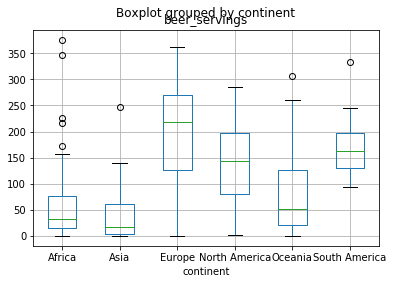

In [29]:
import seaborn as sns
df.boxplot(column = 'beer_servings', by = 'continent')
plt.show()

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.

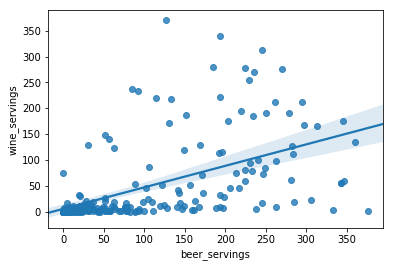

In [9]:
import seaborn as sns 
sns.regplot(x = 'beer_servings', y = 'wine_servings', data = df)

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [10]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
x = df[['wine_servings']]
y = df[['total_litres_of_pure_alcohol']]
lm.fit(x,y)
yhat = lm.predict(x)
print("The predicted total litres of pure alcohol is: ", yhat[0:5])
print("The r squared value is:", lm.score(x,y))



The predicted total litres of pure alcohol is:  [[ 3.15407943]
 [ 4.86088833]
 [ 3.59658545]
 [13.01564196]
 [ 4.57642018]]
The r squared value is: 0.4456875459787605


### Question 7
Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:

In [11]:
from sklearn.linear_model import LinearRegression
x_data = df[['beer_servings', 'spirit_servings', 'wine_servings']]
y_data = df[['total_litres_of_pure_alcohol']]
lm.fit(x_data, y_data)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)
print("The predicted total litres of pure alcohol is: ", lm.predict(x_data)[0:5])
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print("the r squared value is:", lm.score(x_test, y_test))


The predicted total litres of pure alcohol is:  [[ 0.72244985]
 [ 5.26936613]
 [ 1.40409598]
 [12.34732018]
 [ 6.30123153]]
number of test samples : 58
number of training samples: 135
the r squared value is: 0.7664447464639237


<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

an_object = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(an_object)

pipe.fit(x_train,y_train) 

print('The R-square is:',pipe.score(x_test,y_test))

The R-square is: 0.7843511865360325


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$

In [17]:
from sklearn.linear_model import Ridge
RigeModel = Ridge(alpha=0.1) 
RigeModel.fit(x_train,y_train) 

print("The R-squared of the model is:",RigeModel.score(x_test,y_test))

The R-squared of the model is: 0.7554355721027894


<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 

In [27]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['beer_servings', 'spirit_servings', 'wine_servings']])
x_test_pr = pr.fit_transform(x_test[['beer_servings','spirit_servings','wine_servings']])

#Ridge model of regularization parameter = 0.1
Rige_Model = Ridge(alpha=0.1)
Rige_Model.fit(x_train_pr,y_train) #Fitting the model

print("The R-squared of the test data is:",Rige_Model.score(x_test_pr,y_test))

The R-squared of the test data is: 0.7843511761569029


<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook

<b>Sources</b>

<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.